# Import packages

In [1]:
from src.utils import read_gtf
from scripts.splice_sites_annotation import add_phyloP, gtf_to_SJ
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
ORFanage_ss = pl.read_csv("export/ORFanage_splice_sites.csv")

In [2]:
intronic_seq = read_gtf("nextflow_results/V47/orfanage/orfanage.gtf")\
    .filter(pl.col("feature").is_in(["CDS", "exon"]))\
    .filter(pl.col("seqname")!= "chrM")\
    .pipe(gtf_to_SJ)\
    .unique(["chrom", "strand", "start", "end"])\
    .with_columns(
        coord = pl.int_ranges(pl.col("start") - 1, pl.col("end")).list.sample(2, with_replacement=False)
    )\
    .explode("coord")\
    .with_columns(
        is_novel = pl.lit("intronic"),
        start_or_end = pl.lit("start")
    )\
    .pipe(add_phyloP, "data/cactus241way.phyloP.bw", "mammal")


Text(0.5, 0, 'PhyloP score')

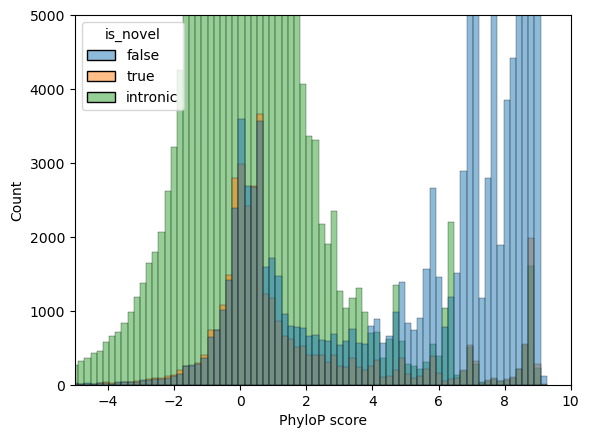

In [10]:
pl.concat([ORFanage_ss.with_columns(pl.col("is_novel").cast(pl.String)), intronic_seq.drop("feature", "start", "end")], how="diagonal")\
    .pipe(sns.histplot, x="mammal_phyloP_1", hue="is_novel")
plt.xlim(-5,10)
plt.ylim(0, 5000)
plt.xlabel("PhyloP score")